In [2]:
from selenium.webdriver.common.service import Service
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from time import sleep
import pandas as pd
import matplotlib.pyplot as plt

## Setting option

In [3]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("start-maximized")
#chrome_options.add_argument("--headless")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--disable-infobars")
chrome_options.add_argument("--disable-extensions")

chrome_options.add_experimental_option(
    "prefs", {"profile.default_content_setting_values.notifications": 1}
)

In [4]:
#Điền thông tin vào user và pass
def login(user, password):
    txtUser = driver.find_element(
        By.XPATH,
        '//*[@id="email"]')
    txtUser.send_keys(user)
    
    txtPassword = driver.find_element(
        By.XPATH,
        '//*[@id="pass"]')
    txtPassword.send_keys(password)
    txtPassword.send_keys(Keys.ENTER)
    
    #Các dòng code dưới là dành cho những ai bật bảo mật 2 lớp, cần nhập mã Authenticator. Không thì có thể comment lại và chạy bình thường
    authenticator = driver.find_element( 
        By.XPATH,
        '//*[@id="approvals_code"]'
    )
    code = input('Nhập mã Authenticator: ')
    authenticator.send_keys(code)
    authenticator.send_keys(Keys.ENTER)

    continue_button = driver.find_element(
        By.XPATH,
        '//*[@id="checkpointSubmitButton"]'
    )

    return continue_button.click()

In [5]:
# Truy cập đường dẫn
def access_post(url):
    driver.get(url)
    return

In [6]:
# Đổi chế độ tất cả bình luận
def change_type():
    list = driver.find_elements(
        By.XPATH,
        '//span[@class="x193iq5w xeuugli x13faqbe x1vvkbs x1xmvt09 x1lliihq x1s928wv xhkezso x1gmr53x x1cpjm7i x1fgarty x1943h6x xudqn12 x3x7a5m x6prxxf xvq8zen x1s688f xi81zsa"]')
    for item in list:
        if item.text == 'Bình luận liên quan nhất':
            change_type_button = item
            break
    return change_type_button.click()

def show_all():
    list = driver.find_elements(
        By.XPATH,
        '//div[@class="xu06os2 x1ok221b"]'
        )
    for item in list:
        if item.text == "Tất cả bình luận":
            show_all_button = item

    return show_all_button.click()

## Hàm chính

In [15]:
driver = webdriver.Chrome(
    service = Service(ChromeDriverManager().install()),
    options = chrome_options
)

url = 'https://www.facebook.com/'
driver.get(url)
sleep(3)

user = input('Nhập tài khoản: ')
password = input('Nhập password: ')
login(user, password)
sleep(3)

url_post = input('Nhập link cần crawl: ')
access_post(url_post)
sleep(3)

change_type()
sleep(2)

show_all()
sleep(2)

find_show_all = driver.find_elements(
        By.XPATH,
        '//span[@class="x193iq5w xeuugli x13faqbe x1vvkbs x1xmvt09 x1lliihq x1s928wv xhkezso x1gmr53x x1cpjm7i x1fgarty x1943h6x xudqn12 x3x7a5m x6prxxf xvq8zen x1s688f xi81zsa"]'
    )

for i in find_show_all:
    if i.text == "Xem các bình luận trước":
        show_all_button = i

while True:
    try:
        show_all_button.click()
        sleep(2)
    except:
        break

name_idx = [name.text for name in driver.find_elements(By.XPATH, '//div[@class="xdj266r x11i5rnm xat24cr x1mh8g0r x1vvkbs"]')]

Nhập tài khoản: dhiepthuhai
Nhập password: Duonghiepdeptraivcl
Nhập mã Authenticator: 503897
Nhập link cần crawl: https://www.facebook.com/groups/1303699020274493/posts/1304576000186795/


In [16]:
name_idx

['14-Hiệp',
 '16-Huy',
 '29-Tùng',
 '35-Bách',
 '25-Thảo',
 '8- Đức',
 '19 - My',
 '09-Dưỡng',
 '59-Vũ',
 '48-My',
 '38-Dũng',
 '26-Thu',
 '15-Hưng',
 '51-Nhung',
 '20-My',
 '05- Chang',
 '23-Quân',
 '39- Duyên',
 '27-Tình',
 '36- Chi',
 '06-Chi',
 '57-Trang',
 '30-Vân',
 '24 - Sơn',
 '21-Ngọc',
 '60 - Yến',
 '49-Ngân',
 '45 - Lâm',
 '17-Linh',
 '41-Hạnh',
 '54-Thảo',
 '10-Giang',
 '12 - Hằng',
 '40-Giang',
 '13-Hay',
 '01-Kim Anh',
 '50_Ngọc',
 '47-Minh',
 '52-Quỳnh',
 '55_ Thuần',
 '37 - Chi',
 '18-Minh',
 '48-Hiền',
 '32-An',
 '07-Danh',
 '34-Vân Anh',
 '43-Hoàn',
 '22-Nhi',
 '11-Hà',
 '03- Ngọc Anh',
 '33-Kim Anh',
 '58- Trang',
 '44-Huyền',
 '02-Anh',
 '53- Tâm',
 '56 - Trà',
 '46-Linh',
 '28-Trâm',
 '04-Ánh']

In [17]:
def string_handle(lst):
    result = ['-'.join(x.split('_')) for x in lst]
    result = [''.join(x.split()) for x in result]
    return result

result = string_handle(name_idx)

In [18]:
result = sorted(result, key=lambda x:int(x.split('-')[0]))
result

['01-KimAnh',
 '02-Anh',
 '03-NgọcAnh',
 '04-Ánh',
 '05-Chang',
 '06-Chi',
 '07-Danh',
 '8-Đức',
 '09-Dưỡng',
 '10-Giang',
 '11-Hà',
 '12-Hằng',
 '13-Hay',
 '14-Hiệp',
 '15-Hưng',
 '16-Huy',
 '17-Linh',
 '18-Minh',
 '19-My',
 '20-My',
 '21-Ngọc',
 '22-Nhi',
 '23-Quân',
 '24-Sơn',
 '25-Thảo',
 '26-Thu',
 '27-Tình',
 '28-Trâm',
 '29-Tùng',
 '30-Vân',
 '32-An',
 '33-KimAnh',
 '34-VânAnh',
 '35-Bách',
 '36-Chi',
 '37-Chi',
 '38-Dũng',
 '39-Duyên',
 '40-Giang',
 '41-Hạnh',
 '43-Hoàn',
 '44-Huyền',
 '45-Lâm',
 '46-Linh',
 '47-Minh',
 '48-My',
 '48-Hiền',
 '49-Ngân',
 '50-Ngọc',
 '51-Nhung',
 '52-Quỳnh',
 '53-Tâm',
 '54-Thảo',
 '55-Thuần',
 '56-Trà',
 '57-Trang',
 '58-Trang',
 '59-Vũ',
 '60-Yến']

In [19]:
df = pd.DataFrame(result, columns=['Phản hồi bài 1 (03-04)'])
df.to_excel('response1_034.xlsx', index = False)

In [20]:
count_03 = sum(1 for x in result if int(x.split('-')[0])<=31)
count_04 = len(result)-count_03

In [21]:
x = ['59/41.03', '59/41.04']
y = [count_03, count_04]

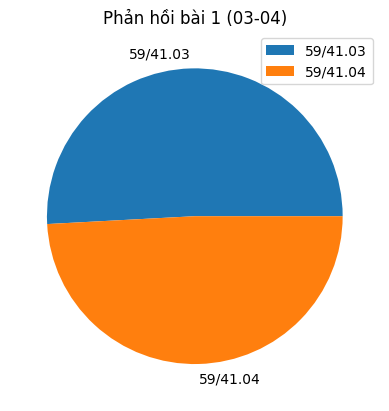

In [22]:
plt.pie(y, labels=x)
plt.title('Phản hồi bài 1 (03-04)')
plt.legend()
plt.savefig('my_plot.png')
plt.show()